## Regression

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

### EDA

In [5]:
df = pd.read_csv("E:\\jupyter\\pollutionprocessed.csv")

In [6]:
df.head()

,AQI.Value,AQI.Category,CO.AQI.Value,CO.AQI.Category,Ozone.AQI.Value,Ozone.AQI.Category,NO2.AQI.Value,NO2.AQI.Category,PM2.5.AQI.Value,PM2.5.AQI.Category
0,51,2,1,1,36,1,0,1,51,2
1,41,1,1,1,5,1,1,1,41,1
2,66,2,1,1,39,1,2,1,66,2
3,34,1,1,1,34,1,0,1,20,1
4,22,1,0,1,22,1,0,1,6,1


<AxesSubplot: >

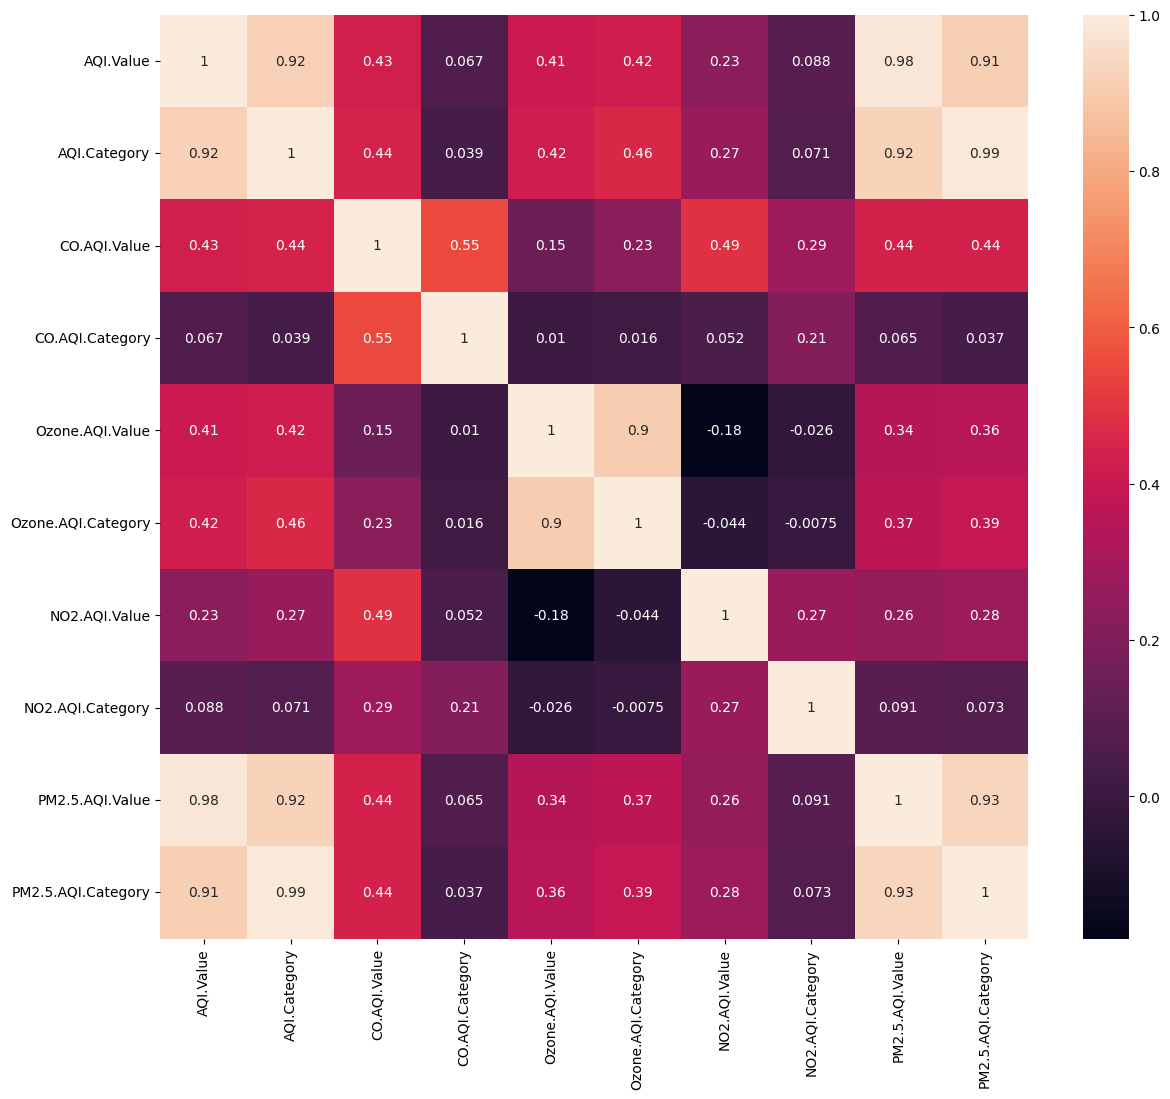

In [7]:

import seaborn as sns
# Correlation matrix for training set
corr = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [8]:
x = df.drop(["AQI.Value"], axis=1)
y = df["AQI.Value"]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [11]:
linear.fit(x_train, y_train)

LinearRegression()

In [12]:
linear.score(x_test, y_test)

0.9805572617173257

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = linear.predict(x_test)
print("Mean Absolute error: ",mean_absolute_error(y_test,y_pred))
print("Mean Squared error: ",mean_squared_error(y_test,y_pred))
print("Root mean Squared error: ", np.mean(mean_squared_error(y_test,y_pred)))

Mean Absolute error:  4.410383674165301
Mean Squared error:  67.23270539368679
Root mean Squared error:  67.23270539368679


# Classification

In [14]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
import matplotlib.pyplot as plt 

### EDA

In [17]:
df = pd.read_csv("E:\\jupyter\\heartprocessed.csv")

In [18]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,2,16.60,1,2,2,3,30,2,2,1,1,1,1,1,5,1,2,1
1,2,20.34,2,2,1,0,0,2,2,2,1,2,1,1,7,2,2,2
2,2,26.58,1,2,2,20,30,2,1,3,1,1,1,2,8,1,2,2
3,2,24.21,2,2,2,0,0,2,2,4,1,2,2,3,6,2,2,1
4,2,23.71,2,2,2,28,0,1,2,5,1,2,1,1,8,2,2,2


<AxesSubplot: >

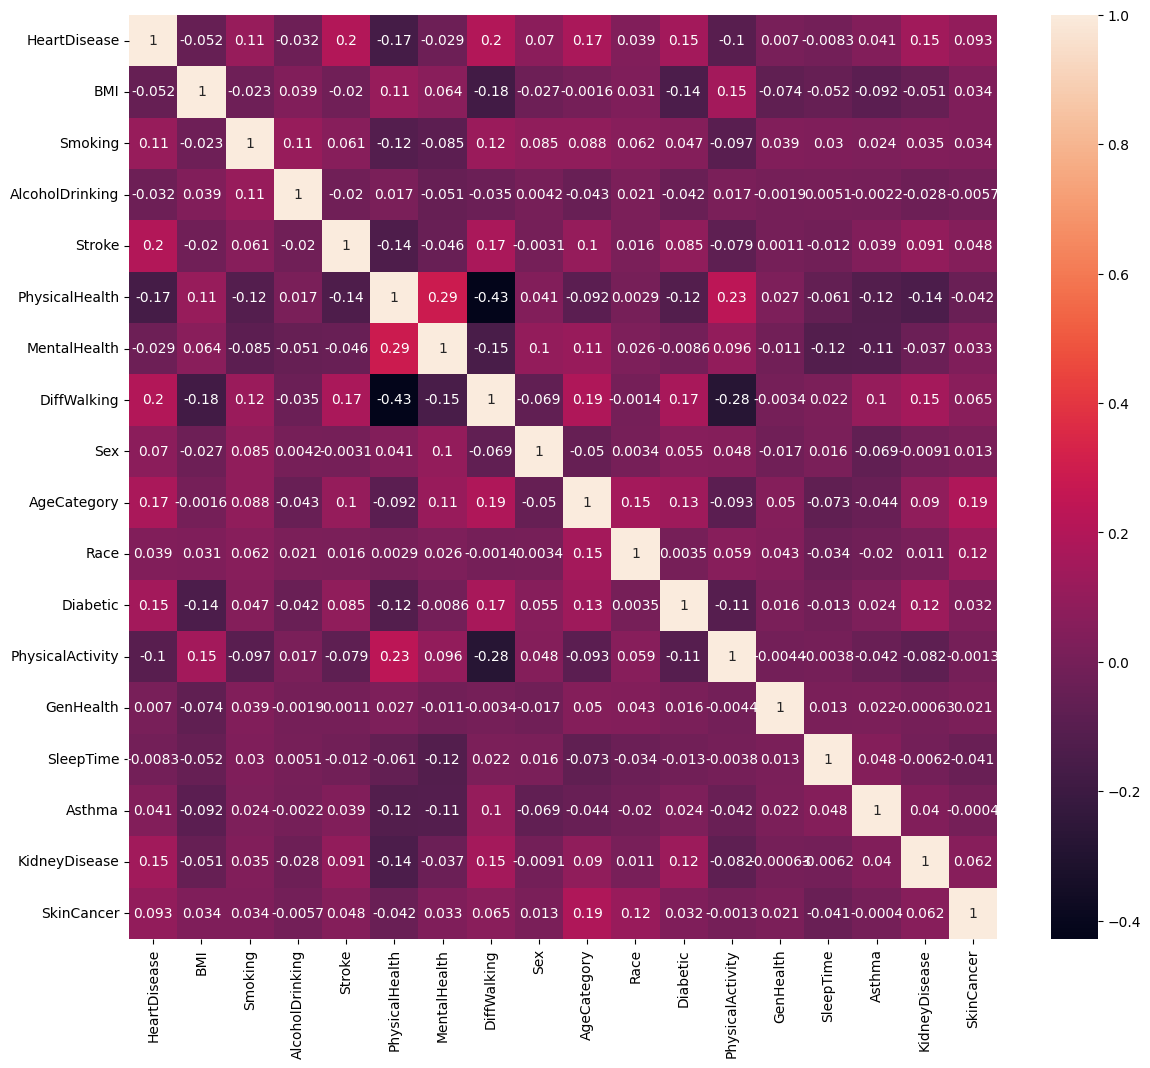

In [19]:
import seaborn as sns
# Correlation matrix for training set
corr = df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [20]:
df[["HeartDisease"]].nunique()

HeartDisease    2
dtype: int64

In [21]:
df["HeartDisease"].value_counts()

2    292422
1     27373
Name: HeartDisease, dtype: int64

<BarContainer object of 2 artists>

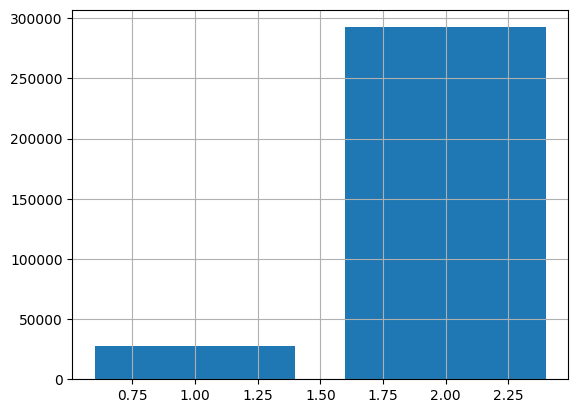

In [22]:
plt.grid()
plt.bar(x=[2,1],height=list(df["HeartDisease"].value_counts()))

In [23]:
x = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1, stratify=y)
from sklearn.model_selection import cross_val_score

### Knn

In [25]:

knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
print(cv_scores)
print(cv_scores.mean())

[0.89870073 0.89895089 0.89970137 0.89891962 0.89952939]
0.8991603996310136


In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
knn_cv.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
y_pred = knn_cv.predict(x_test)

In [29]:
cm1 = confusion_matrix(y_pred, y_test)

In [30]:
print(cm1)

[[  832  2297]
 [ 7380 85430]]


In [31]:
from sklearn.metrics import recall_score, accuracy_score, f1_score

KnnRecall = recall_score(y_test,y_pred)
KnnAccuracy = accuracy_score(y_test,y_pred)
KnnF1 = f1_score(y_test,y_pred)


print(KnnRecall)
print(KnnAccuracy)
print(KnnF1)

0.10131514856307842
0.8991338246177258
0.14672427475531258


### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)


param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

tree = DecisionTreeClassifier()

tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

tree_cv.fit(X_train,y_train)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 5}
Best score is 0.9147755694437427


In [33]:
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score, recall_score

finalTree = DecisionTreeClassifier(criterion='entropy', max_depth= 3, max_features = 6, min_samples_leaf = 7)

finalTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=6,
                       min_samples_leaf=7)

In [34]:
y_pred = finalTree.predict(X_test)

In [35]:
cm2 = confusion_matrix(y_test,y_pred)
print(cm2)

[[    0  8212]
 [    0 87727]]


In [36]:
DtF1 = f1_score(y_test,y_pred)
print(DtF1)

0.0


In [37]:
DtRecall = recall_score(y_test,y_pred)
print(DtRecall)

0.0


In [38]:
DtAcc = accuracy_score(y_test,y_pred)
print(DtAcc)

0.9144039441728599


In [39]:
DtF1

0.0

<BarContainer object of 2 artists>

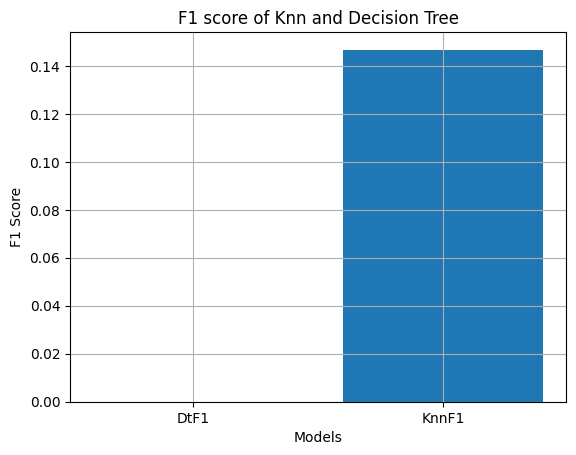

In [40]:

plt.grid()
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 score of Knn and Decision Tree')
plt.bar(x=['DtF1','KnnF1'],height = [DtF1,KnnF1])

<BarContainer object of 2 artists>

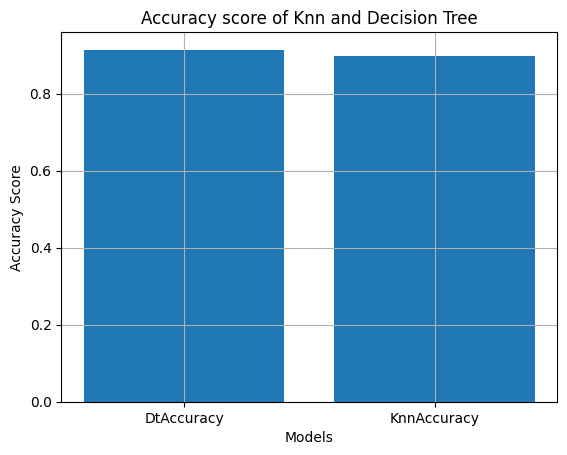

In [41]:

plt.grid()
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy score of Knn and Decision Tree')
plt.bar(x=['DtAccuracy','KnnAccuracy'],height = [DtAcc,KnnAccuracy])

<BarContainer object of 2 artists>

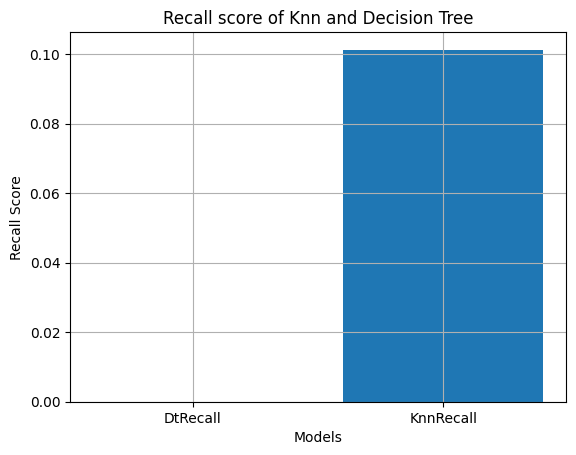

In [42]:
plt.grid()
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Recall score of Knn and Decision Tree')
plt.bar(x=['DtRecall','KnnRecall'],height = [DtRecall,KnnRecall])

## Oversampling to improve model

In [43]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over,y_over = oversample.fit_resample(x,y)

In [44]:
y_over.value_counts()

2    292422
1    292422
Name: HeartDisease, dtype: int64

<BarContainer object of 2 artists>

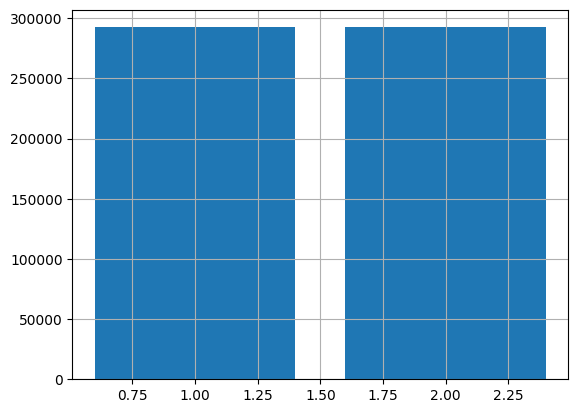

In [45]:
plt.grid()
plt.bar(x=[2,1],height=list(y_over.value_counts()))

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=0)

### Decision Tree

In [47]:
from sklearn.metrics import confusion_matrix,f1_score
finalTree = DecisionTreeClassifier(criterion='entropy', max_depth =20 , max_features = 25, min_samples_leaf = 7)
finalTree.fit(X_train,y_train)
y_pred = finalTree.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[78495  9478]
 [20843 66638]]


In [48]:
DtAcc = finalTree.score(X_test,y_test)
print(DtAcc)

0.8271854731154604


In [49]:
DtF1 = f1_score(y_test,y_pred)
print(DtF1)

0.838124829828467


In [50]:
DtRecall =recall_score(y_test,y_pred)
print(DtRecall)

0.8922623986905073


In [51]:
import graphviz
from sklearn import tree

### KNN

In [52]:
knnFinal = KNeighborsClassifier(n_neighbors=3)
knnFinal.fit(X_train,y_train)
y_pred = knnFinal.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[87649   324]
 [14215 73266]]


In [53]:
KnnAccuracy = knnFinal.score(X_test,y_test)
print(KnnAccuracy)

0.9171349755491468


In [54]:
KnnF1 = f1_score(y_test,y_pred)
print(KnnF1)

0.9234132439935312


In [55]:
Knnrecall = recall_score(y_test,y_pred)
print(Knnrecall)

0.9963170518227183


<BarContainer object of 2 artists>

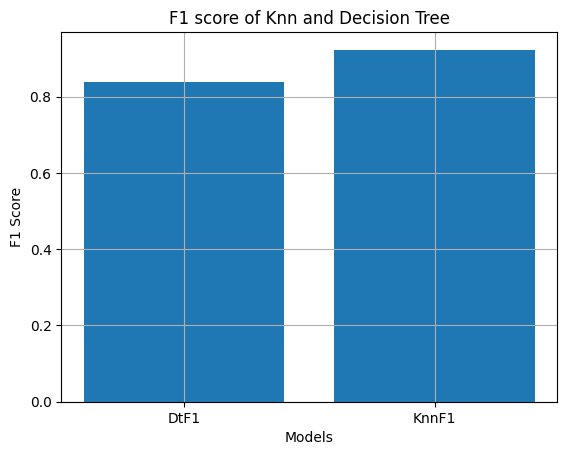

In [56]:
plt.grid()
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 score of Knn and Decision Tree')
plt.bar(x=['DtF1','KnnF1'],height = [DtF1,KnnF1])

<BarContainer object of 2 artists>

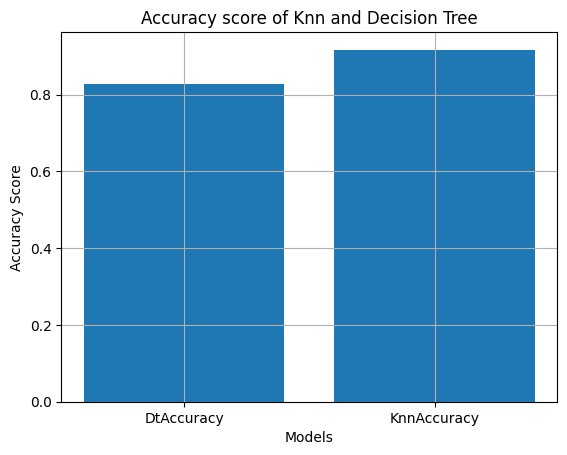

In [57]:
plt.grid()
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy score of Knn and Decision Tree')
plt.bar(x=['DtAccuracy','KnnAccuracy'],height = [DtAcc,KnnAccuracy])

<BarContainer object of 2 artists>

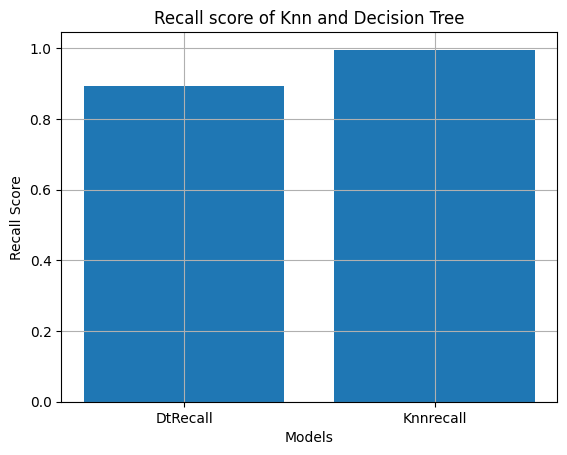

In [59]:
plt.grid()
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.title('Recall score of Knn and Decision Tree')
plt.bar(x=['DtRecall','Knnrecall'],height = [DtRecall,Knnrecall])